<div style="text-align: center">
<img src="https://www.frenchscienceindia.org/wp-content/uploads/2017/02/Logo-Univ-Paris-Saclay.png" width="150px">
</div>

# Starting kit on Garbage-Classification

_Jiaxin GAO, Robin Duraz, Hao Liu, Théo Cornille, VuThanh Trung_

1. [Introduction](#Introduction)
2. [Preprocessing](#Preprocessing)
3. [Workflow](#Workflow)
4. [Evaluation](#Scoring)
5. [Local testing/exploration](#Local-testing)
6. [Submission](#Submitting-to-ramp.studio)

## Introduction

Nowadays, trash are everywhere in our society. Different materials are used in our everyday life to wrap things, from food to clothing or even any package you send or receive via postal services. All those materials don't have any use other than wrap or protect the things inside. 
The problem is, once you open it, the wrapping doesn't have any other use and thus, can only be thrown to the garbage can, or sort it to be recycled.
All over the world, trash are handled differently and some that would recycled in some countries will be left untreated in others.
In many cases, trash that could be handled and recycled end up in big open air rubbish sites somewhere in Africa or any place far away from their original source, where they will be left as is, or just burned away, creating toxic smokes endengering the lives of people on site.
Those practices are harmful for the planet and many of those places exist in the world.

<img src="https://africanarguments.org/wp-content/uploads/2017/04/ethiopia-rubbish-koshe-sandafa-768x512.jpg" width="500px">

Their are also other places like landfills where it is just piled up. Just in USA, the amount generated in a year is estimated to about 250 million tons, and the weight of most of it is a much smaller problem than its volume.

# Business case

Hence, recycling is necessary for a sustainable society, and also allows to remake many things that would be used instead of exhausting other materials. Their are already things done with recycled plastic or metals, but still too few of those exist.

The current recycling process requires first people to sort their trash, with only part of it sorted. Then, workers in recycling facilities sort it by hand to further separate garbage according to their treatment. For all other garbages, their ending is similar to what is shown above.
Learning how to handle all of this is a necessity, as well as a big opportunity to generate materials without exhausting primary resources and in many cases, can save a lot of money.
All of this requires many steps, of which separating trash in different kinds requiring different treatments is the first part.
This being the first step, it is also one that can be done done by machines to make it easier as well as faster.
In the current society, consumers can be confused about how to dispose of all the different trash they throw, and many times, materials that could be recycled aren't because they aren't sorted correctly in the beginning.

Our goal is to work on an automated way to classify different kinds of trash, which can greatly raise the amount of trash correctly treated. It can heavily reduce untreated waste and also increase the amount which will be recycled.

### The prediction task

A computer vision approach to classifying
garbage into recycling categories could be an efficient
way to process waste. The objective of this project is
to take images of a single piece of recycling or garbage
and classify it into six classes consisting of glass, paper,
metal, plastic, cardboard, and trash.

<img src="http://bateriaswillard.com/site/wp-content/uploads/2017/03/6-01-2-1.png" width="70%">
<div style="text-align: center"> </div>

The quality of the prediction will be measured with a multi-class version of the F1-score. The better the prediction means the more trash will be correctly treated and possibly recycled and reused.

As said before, the predictor is meant to be part of a big system handling waste and trash and its decision should be used by other machines to separate garbage and put the same kinds together to be processed at the same time.

It doesn't need to be used by humans and should be part of a fully automated system having the goal of sending each garbage to the place where they will be treated.

This kind of problem changes very quickly because new things are created and then thrown everyday, and deciding what to do with it can be hard. A solution is to train the model with an unknown/common trash category meant to gather everything that isn't recycleable or reusable, and hence will be sent to human workers to handle.

## The data

We use a dataset that contains between 300 and 500 images for each
class (except the trash class which is less represented), which was hand collected by Mindy Yang & Gary Thung. Their [GitHub](https://github.com/garythung/trashnet) and [Dataset](http://drive.google.com/drive/folders/0B3P9oO5A3RvSUW9qTG11Ul83TEE) are provided in the links.

The first and the easiest method is to train a predictor on trash images found in datasets, on the web, or on photos directly taken.

Any trash image could be exploited but we need to differentiate problems where there is only one kind of garbage in an image (as we do), with images containing different kinds of garbage (as can be seen in the article in reference 2 below).

Generally, sorting trash will be closer to the second type and will need image detection as well as a classification to be fully efficient. In that case, data that could be exploited is harder to find but there exist solutions, like the one presented in the article on Smart Trash Net.

### References

1. Mindy Yang & Gary Thung, Classification of Trash for Recyclability Status. 

2. Oluwasanya Awe, Robel Mengistu, Vikram Sreedhar, Smart Trash Net: Waste Localization and Classification



### Required dependencies and downloads

You need to check our runing requirements to be able to use our notebook on your PC. Simply run the command below

In [1]:
# !pip install -r requirements.txt

#### Download script (optional)

If the data has not yet been downloaded locally, uncomment the following cell and run it.

There are ~40Mb of images.

In [2]:
# !python download_data.py

In [3]:
# !pip install torch
# !pip install torchvision
# !pip install tqdm

## Data augmentation

Deep neural networks often need a large amount of data. However the dataset we have may not be enough to efficient training. That is why we recommend you to use data augmentation to improve your accuracy and avoid overfitting.*

1. Scaling

2. Translation

3. Rotation (at 90 degrees)

4. Rotation (at finer angles)

5. Flipping

6. Adding Salt and Pepper noise

7. Lighting condition

8. Perspective transform

In [4]:
# !pip install Pillow==4.0.0
# !pip install PIL
# !pip install image
# from PIL import Image

In [2]:
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join

In [10]:
path = "GARBAGES"
count = {"glass":0 ,"paper":0 ,"metal":0 ,"plastic":0 ,"cardboard":0 ,"trash":0}
images = []
for d in listdir(path):
    for d2 in listdir(join(path, d)):  
        for f in listdir(join(path,d,d2)):
            count[d2]+=1
            img_p = join(join(path,d, d2),f)
            images.append(img_p)

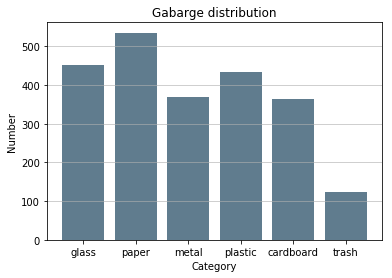

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(list(count.keys()), count.values(),color='#607c8e')
plt.title('Gabarge distribution')
plt.xlabel('Category')
plt.ylabel('Number')
plt.grid(axis='y', alpha=0.75)

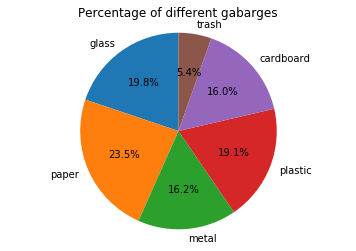

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie(count.values(), labels=list(count.keys()), startangle=90, autopct='%.1f%%')
plt.title('Percentage of different gabarges')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Below 3 randomly selected images are shown. You can also choose the values.

[383, 1608, 50]


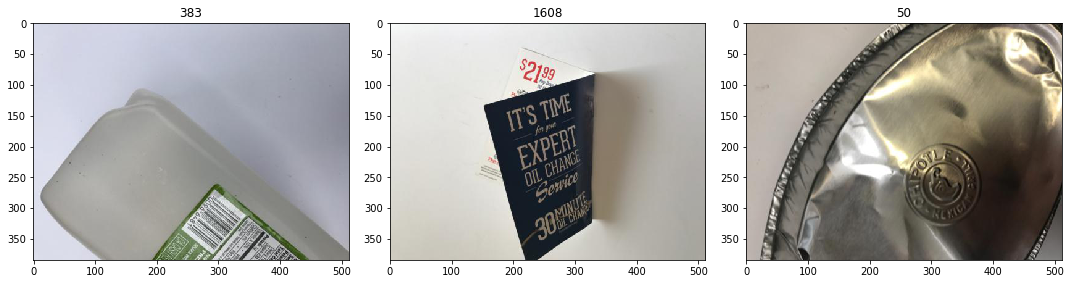

In [13]:
idx_list = np.random.randint(0,len(images),3).tolist()
print (idx_list)
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for i, idx in enumerate(idx_list):
    axes[i].imshow(np.asarray(Image.open(images[idx])), cmap='Greys_r')
    axes[i].set_title('%d' % idx)
fig.tight_layout()

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import time
import os
import argparse
import torchvision
from torch.autograd import Variable 
from torchvision import transforms
from tqdm import tqdm

In [11]:
## Load the model 
model_conv = torchvision.models.resnet18(pretrained=True)

In [13]:
n_class = 6# Number of filters in the bottleneck layer
# Since imagenet as 1000 classes , We need to change our last layer according to the number of classes we have,
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, n_class)

In [14]:
#Architecture of Alexnet
model_conv

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [15]:
def train_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, use_gpu, num_epochs=25, mixup = False, alpha = 0.1):
    if use_gpu:
        model.cuda()
        criterion.cuda()
    
    print("MIXUP".format(mixup))
    since = time.time()
    
    # graphs
    loss_values_train = []
    loss_values_valid = []
    acc_values_train = []
    acc_values_valid = []

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            print(phase)
            for data in tqdm(dataloaders[phase]):
                # get the inputs
                inputs, labels = data
                
                #augementation using mixup
                if phase == 'train' and mixup:
                    inputs = mixup_batch(inputs, alpha)
                    
                if use_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()
                
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                if type(outputs) == tuple:
                    outputs, _ = outputs
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            if phase == 'train':
                loss_values_train.append(epoch_loss)
                acc_values_train.append(epoch_acc)
            else:
                loss_values_valid.append(epoch_loss)
                acc_values_valid.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, ((loss_values_train, acc_values_train), (loss_values_valid, acc_values_valid))

In [16]:
## Loading the dataloaders -- Make sure that the data is saved in following way
"""
data/
  - train/
      - class_1 folder/
          - img1.png
          - img2.png
      - class_2 folder/
      .....
      - class_n folder/
  - val/
      - class_1 folder/
      - class_2 folder/
      ......
      - class_n folder/
"""

data_dir = "data"
input_shape = 224
batch_size = 32
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
scale = 360
input_shape = 224
use_parallel = False
use_gpu = False
epochs = 1

data_transforms = transforms.Compose([
        transforms.Resize(scale),
        transforms.RandomResizedCrop(input_shape),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(degrees=90),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])


image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                      data_transforms) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                         shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print (class_names)
print (dataset_sizes)

if use_parallel:
    print("[Using all the available GPUs]")
    model_conv = nn.DataParallel(model_conv, device_ids=[0, 1])

print("[Using CrossEntropyLoss...]")
criterion = nn.CrossEntropyLoss()

print("[Using small learning rate with momentum...]")
optimizer_conv = optim.SGD(list(filter(lambda p: p.requires_grad, model_conv.parameters())), lr=0.001, momentum=0.9)

print("[Creating Learning rate scheduler...]")
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
{'train': 1265, 'val': 633}
[Using CrossEntropyLoss...]
[Using small learning rate with momentum...]
[Creating Learning rate scheduler...]


In [17]:
print("[Training the model begun ....]")
# train_model function
model_ft, t = train_model(model_conv, dataloaders, dataset_sizes, criterion, optimizer_conv, exp_lr_scheduler, use_gpu,
                     num_epochs=epochs)

  0%|          | 0/40 [00:00<?, ?it/s]

[Training the model begun ....]
MIXUP
Epoch 0/0
----------
train


  0%|          | 0/20 [00:00<?, ?it/s]

train Loss: 0.0474 Acc: 0.4047
val


100%|██████████| 20/20 [00:39<00:00,  1.77s/it]

val Loss: 0.0360 Acc: 0.6019

Training complete in 4m 42s
Best val Acc: 0.601896


In [21]:
torch.save(model_ft,'model.pkl')

In [19]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# #Loss
# x = range(15)
# plt.figure()
# plt.plot(x, t[0][0], "b", label="train")
# plt.plot(x, t[1][0], "r", label="valid")
# plt.title("Loss values")
# plt.xlabel("Epoch")
# plt.ylabel("Epoch loss")
# plt.legend()
# plt.show()
# #Accu
# x = range(15)
# plt.figure()
# plt.plot(x, t[0][1], "b", label="train")
# plt.plot(x, t[1][1], "r", label="valid")
# plt.title("Accuracy values")
# plt.xlabel("Epoch")
# plt.ylabel("Epoch accuracy")
# plt.legend()
# plt.show()

**Deep learning for image classification**

Different approaches and published models:

- AlexNet (https://arxiv.org/pdf/1707.07012.pdf):
- VGG (Visual Geometry Group of Oxford, [paper](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Redmon_You_Only_Look_CVPR_2016_paper.pdf))
- ResNet (Deep residual networks, [paper](https://arxiv.org/pdf/1512.03385.pdf))

If you are not familiar with these architectures you can check this out [Image Classification Architectures review](https://medium.com/@14prakash/image-classification-architectures-review-d8b95075998f).

The starting kit contains a `ResNet18` example, using a simplifed version of ResNet and using PyTorch implementation https://pytorch.org/docs/stable/torchvision/models.html#id3

The architecture of resnet18 in a nut shell
<img src="https://www.researchgate.net/profile/Muhammad_Hasan19/publication/323063171/figure/fig1/AS:603178554904576@1520820382219/Proposed-Modified-ResNet-18-architecture-for-Bangla-HCR-In-the-diagram-conv-stands-for.png" width="800px">